In [1]:
import pandas as pd

In [2]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('alucar.csv')

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print(f'Quantidade de linhas e colunas {alucar.shape}')

Quantidade de linhas e colunas (24, 2)


In [6]:
print(f'Quantidade de dados nulos {alucar.isna().sum().sum()}')

Quantidade de dados nulos 0


In [7]:
print('Qual tipo de dados das colunas')
print(f'{alucar.dtypes}')

Qual tipo de dados das colunas
mes       object
vendas     int64
dtype: object


In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [9]:
print('Qual tipo de dados das colunas')
print(f'{alucar.dtypes}')

Qual tipo de dados das colunas
mes       datetime64[ns]
vendas             int64
dtype: object


In [10]:
!pip install seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [11]:
print(sns.__version__)

0.11.1


<AxesSubplot:xlabel='mes', ylabel='vendas'>

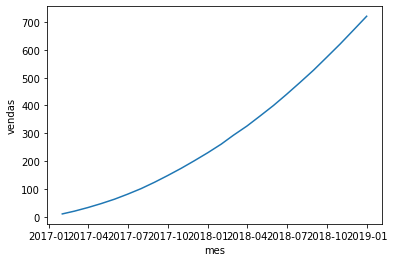

In [12]:
sns.lineplot(x= 'mes', y = 'vendas', data = alucar)

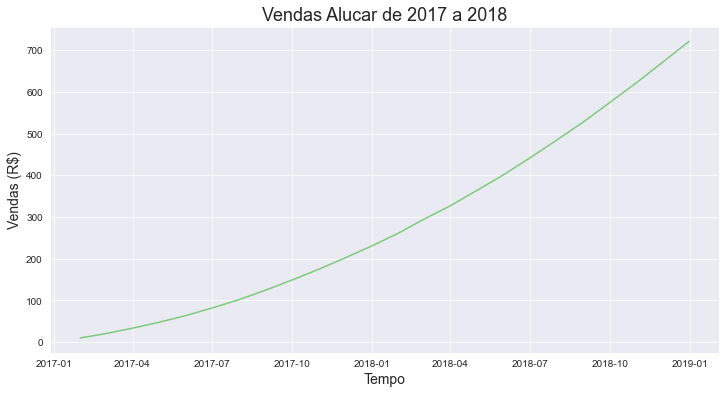

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x= 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 a 2018', loc ='center', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [14]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


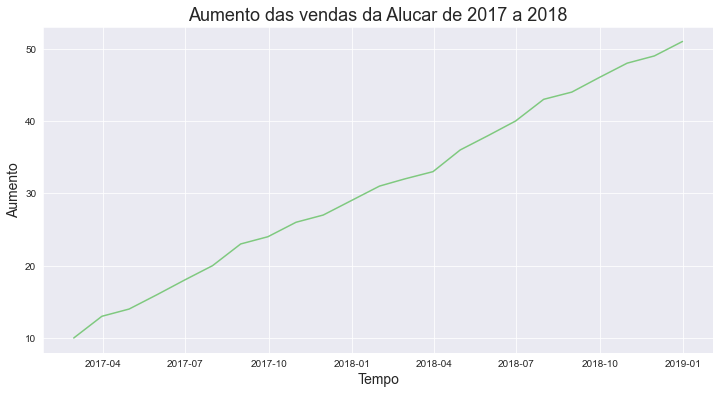

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x= 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 a 2018', loc ='center', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [16]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc ='center', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

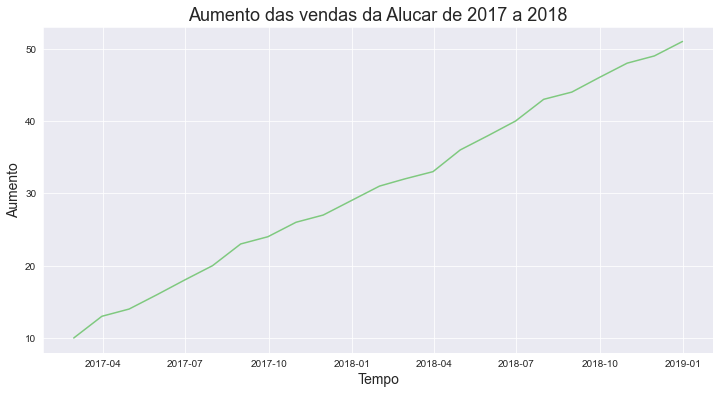

In [17]:
plotar('Aumento das vendas da Alucar de 2017 a 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [18]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


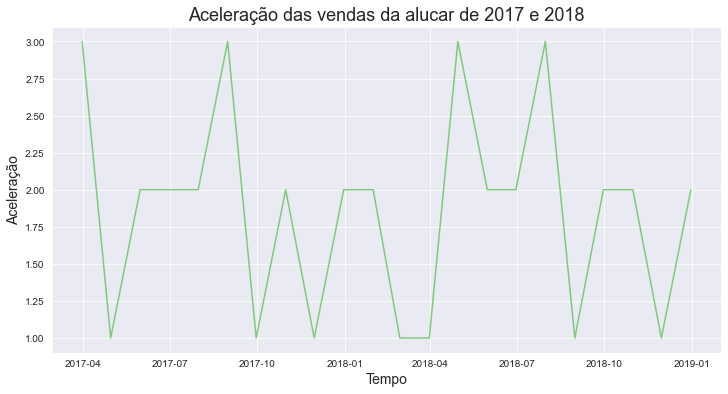

In [19]:
plotar('Aceleração das vendas da alucar de 2017 e 2018', 'Tempo','Aceleração','mes', 'aceleracao', alucar)

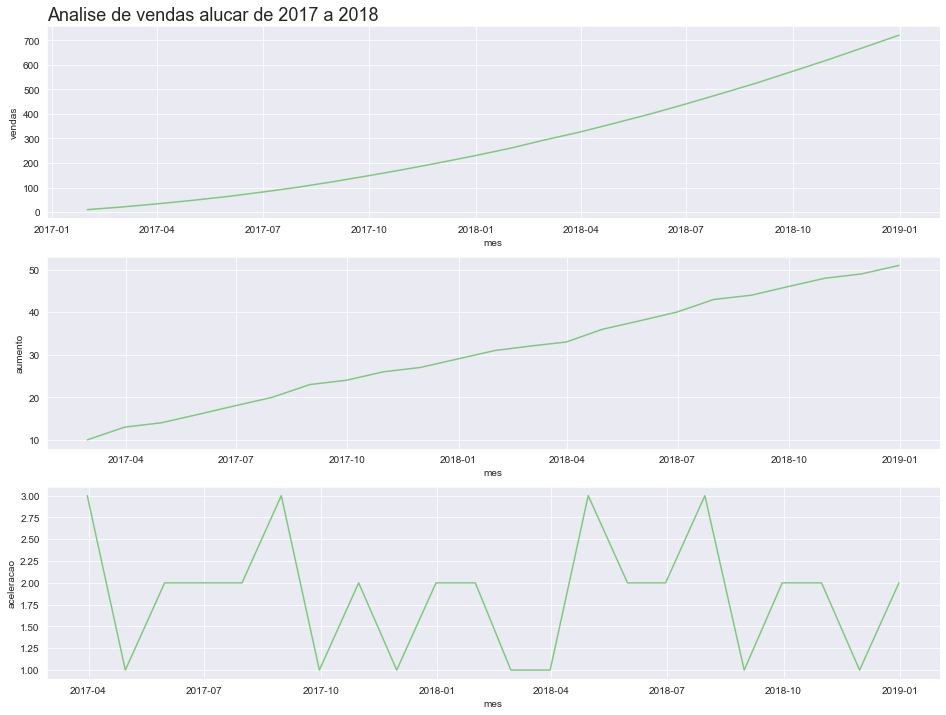

In [20]:
plt.figure(figsize= (16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise de vendas alucar de 2017 a 2018', fontsize = 18, loc = 'left')
ax = sns.lineplot(x= 'mes', y = 'vendas', data = alucar)
plt.subplot(3,1,2)
ax = sns.lineplot(x= 'mes', y = 'aumento', data = alucar)
plt.subplot(3,1,3)
ax = sns.lineplot(x= 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [21]:
def plot_comparacao(x, y1, y2, y3,dataset, titulo):
    plt.figure(figsize= (16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    ax = sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3,1,2)
    ax = sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3,1,3)
    ax = sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

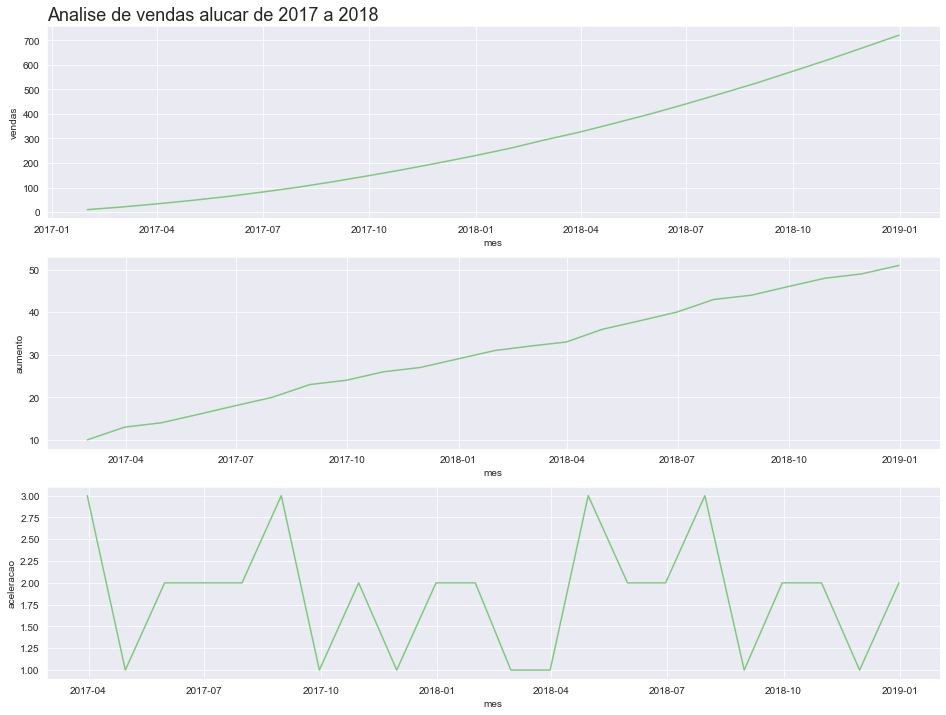

In [22]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar,'Analise de vendas alucar de 2017 a 2018' )

In [23]:
from pandas.plotting import autocorrelation_plot

C:\Users\Tássio Sales\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


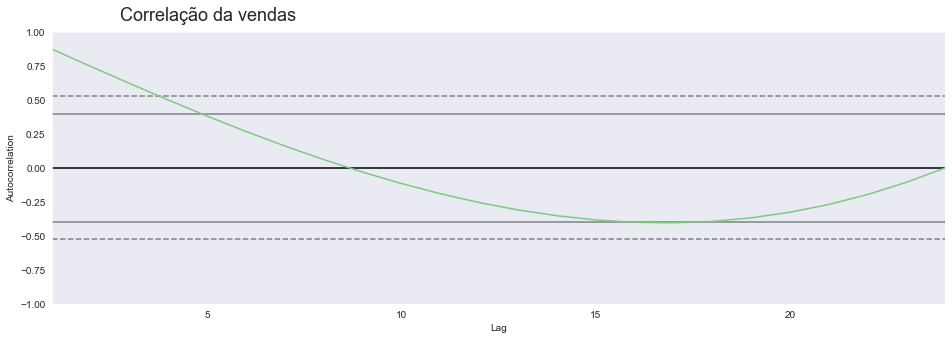

In [24]:
ax = plt.figure(figsize = (16,5))
ax.suptitle('Correlação da vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax 

C:\Users\Tássio Sales\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


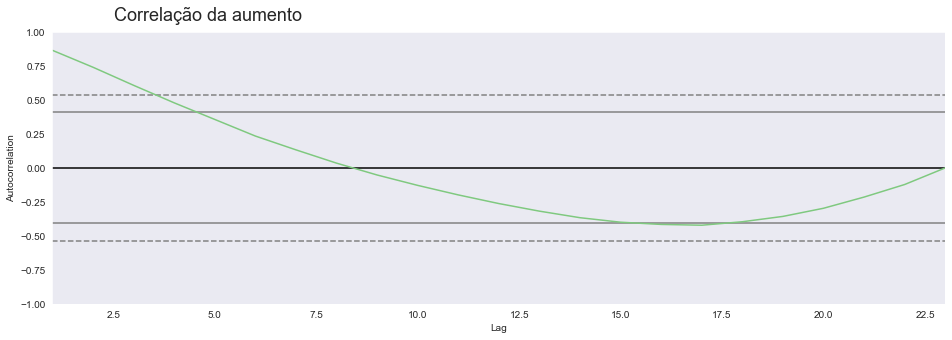

In [25]:
ax = plt.figure(figsize = (16,5))
ax.suptitle('Correlação da aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

C:\Users\Tássio Sales\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


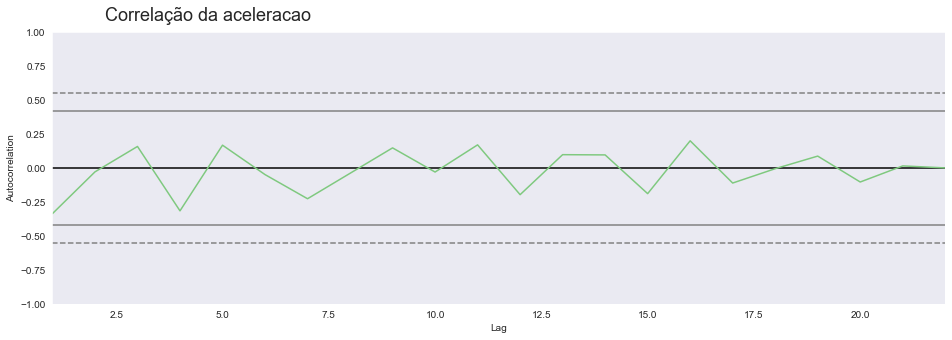

In [26]:
ax = plt.figure(figsize = (16,5))
ax.suptitle('Correlação da aceleracao', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [27]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [28]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [29]:
print(f'A quantidade de linhas e colunas e {assinantes.shape}')
print(f'A quantidade de dados nulos e {assinantes.isna().sum().sum()}')

A quantidade de linhas e colunas e (24, 2)
A quantidade de dados nulos e 0


In [30]:
assinantes['mes'] = pd.to_datetime(assinantes['mes']) 
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [31]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


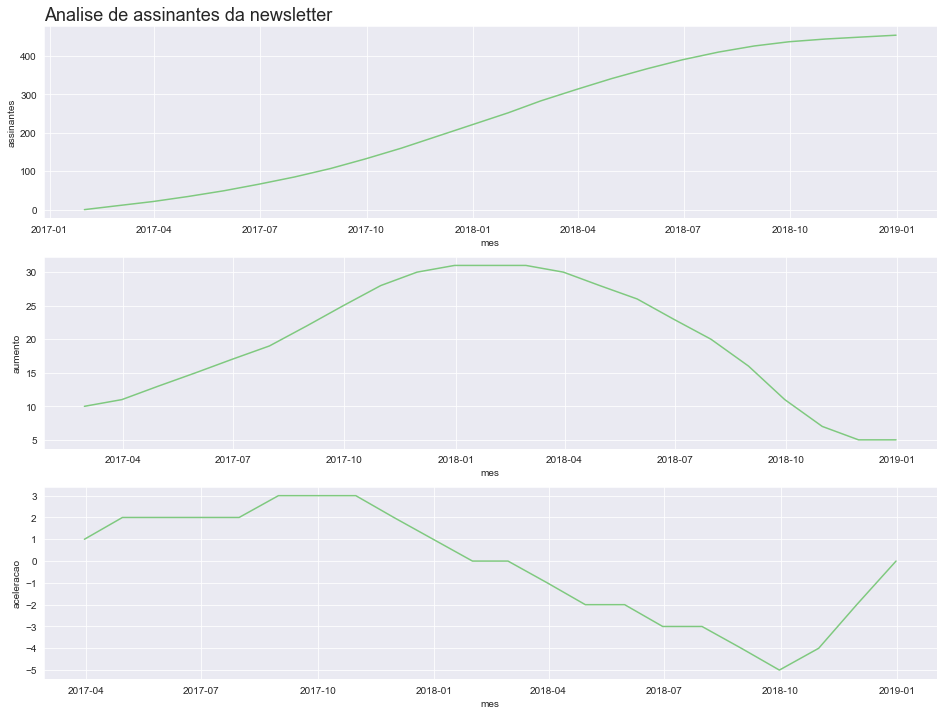

In [32]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Analise de assinantes da newsletter')

In [33]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [34]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [35]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [36]:
print(f'A quantidade de linhas e colunas e {chocolura.shape}')
print(f'A quantidade de dados nulos e {chocolura.isna().sum().sum()}')

A quantidade de linhas e colunas e (24, 2)
A quantidade de dados nulos e 0


In [37]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


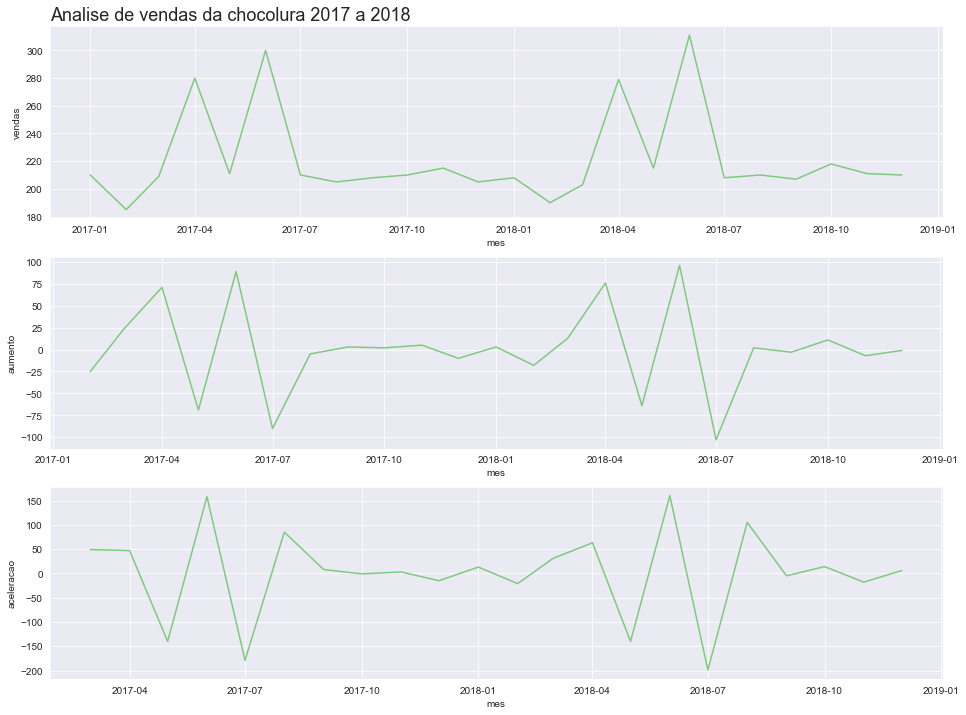

In [38]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Analise de vendas da chocolura 2017 a 2018')

In [39]:
vendas_por_dia =  pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [40]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [41]:
print(f'A quantidade de linhas e colunas e {vendas_por_dia.shape}')
print(f'A quantidade de dados nulos e {vendas_por_dia.isna().sum().sum()}')

A quantidade de linhas e colunas e (61, 2)
A quantidade de dados nulos e 0


In [42]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


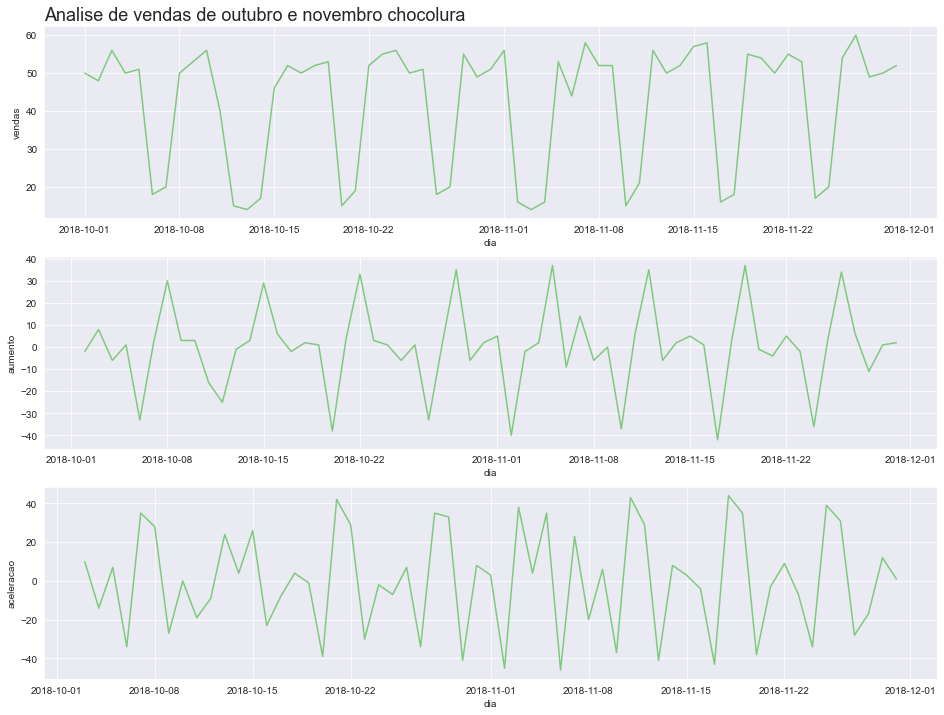

In [43]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Analise de vendas de outubro e novembro chocolura')

In [44]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [45]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [46]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [47]:
dias_traduzidos = {'Monday':'segunda','Tuesday':'terça','Wednesday':'quarta',
                   'Thursday':'quinta','Friday':'sexta','Saturday':'sabado',
                   'Sunday':'domingo'}

In [48]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terça
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo
7,2018-10-08,50,30.0,28.0,segunda
8,2018-10-09,53,3.0,-27.0,terça
9,2018-10-10,56,3.0,0.0,quarta


In [49]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

<ipython-input-49-50062ad17e95>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


In [50]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terça,52.0,-1.0,-34.0


C:\Users\Tássio Sales\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


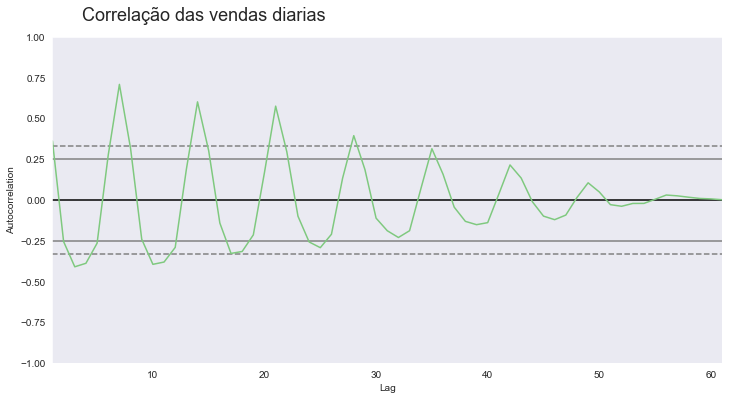

In [51]:
ax = plt.figure(figsize =(12,6))
ax.suptitle('Correlação das vendas diarias', fontsize=18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

C:\Users\Tássio Sales\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


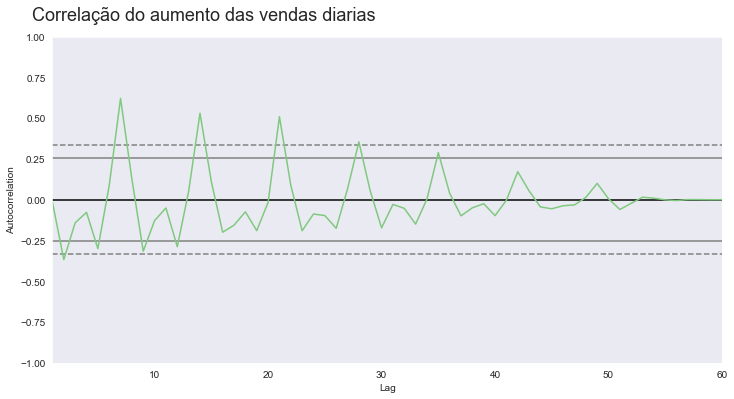

In [52]:
ax = plt.figure(figsize =(12,6))
ax.suptitle('Correlação do aumento das vendas diarias', fontsize=18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

C:\Users\Tássio Sales\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


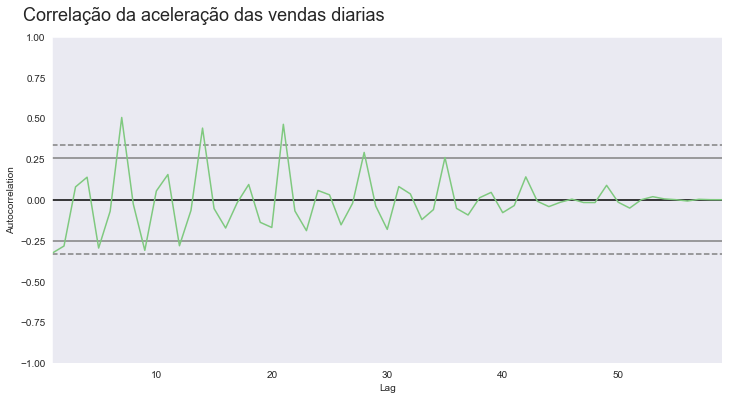

In [53]:
ax = plt.figure(figsize =(12,6))
ax.suptitle('Correlação da aceleração das vendas diarias', fontsize=18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

In [54]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [55]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [56]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [57]:
print(f'A quantidade de linhas e colunas e {cafelura.shape}')
print(f'A quantidade de dados nulos e {cafelura.isna().sum().sum()}')

A quantidade de linhas e colunas e (24, 2)
A quantidade de dados nulos e 0


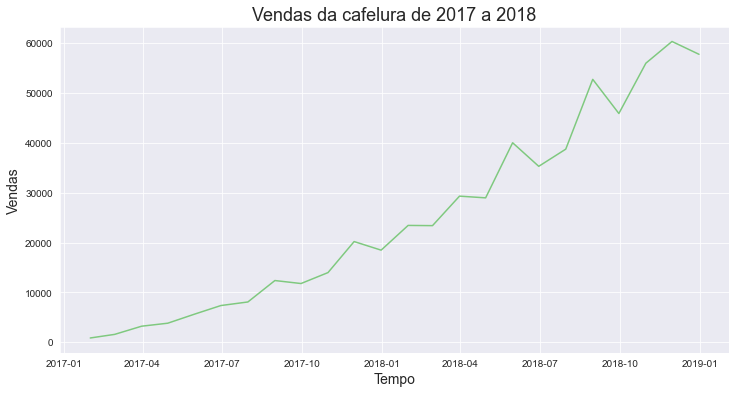

In [58]:
plotar('Vendas da cafelura de 2017 a 2018', 'Tempo', 'Vendas',
      'mes', 'vendas', cafelura)

In [59]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [60]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [61]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


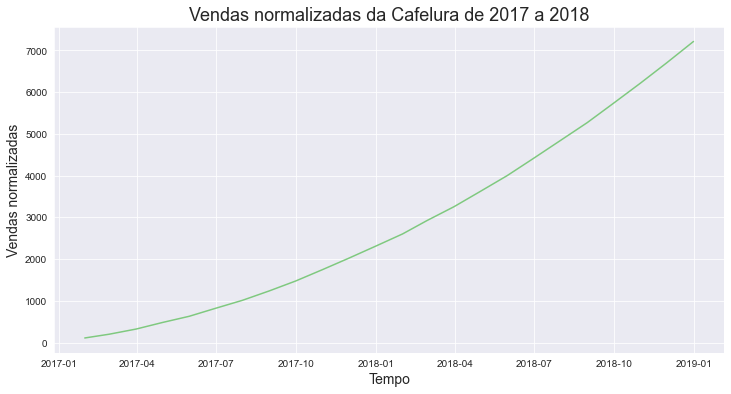

In [62]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

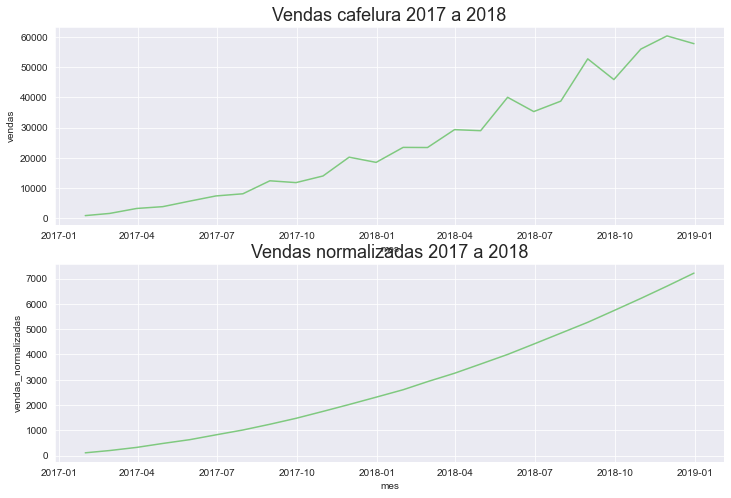

In [63]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas cafelura 2017 a 2018', fontsize=18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas 2017 a 2018', fontsize=18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)
ax = ax

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

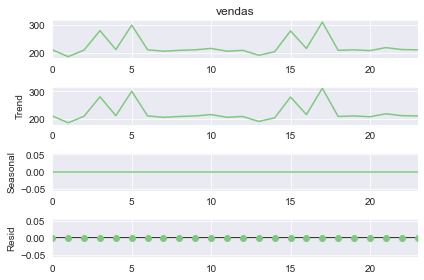

In [68]:
resultado = seasonal_decompose(chocolura['vendas'], period=1)
ax = resultado.plot()

In [69]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [70]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,210.0,0.0,0.0
1,185.0,185.0,0.0,0.0
2,209.0,209.0,0.0,0.0
3,280.0,280.0,0.0,0.0
4,211.0,211.0,0.0,0.0


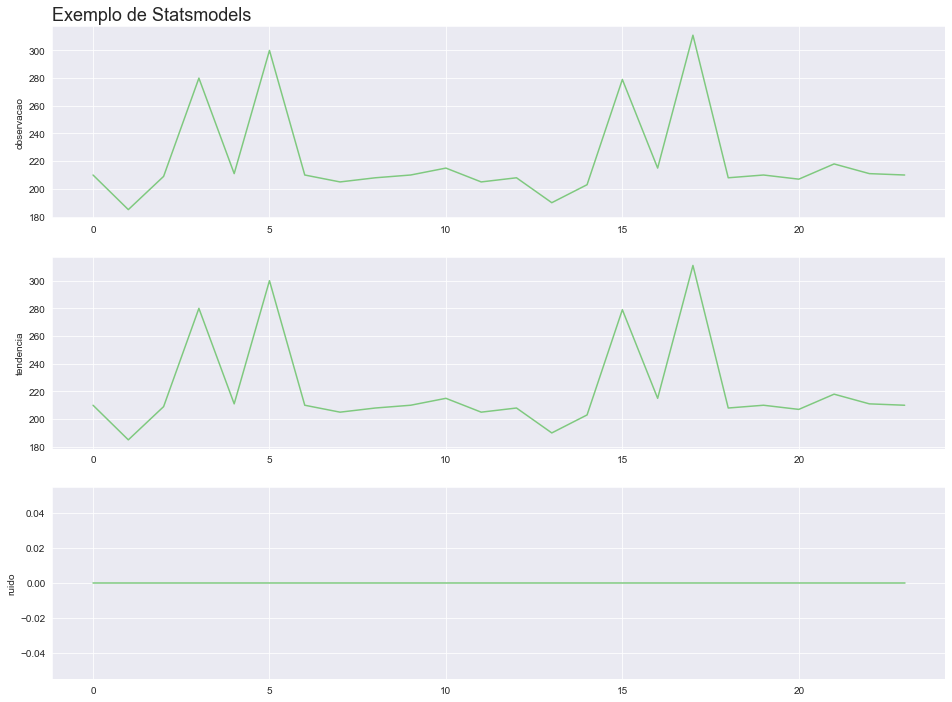

In [71]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

In [72]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [73]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [74]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [75]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

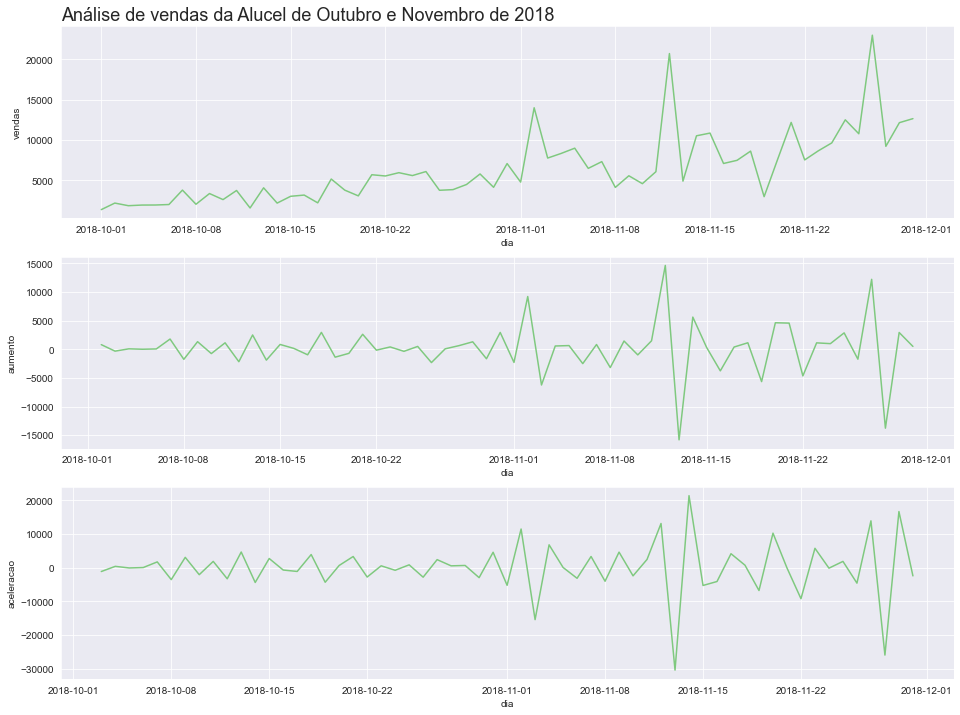

In [76]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

In [77]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

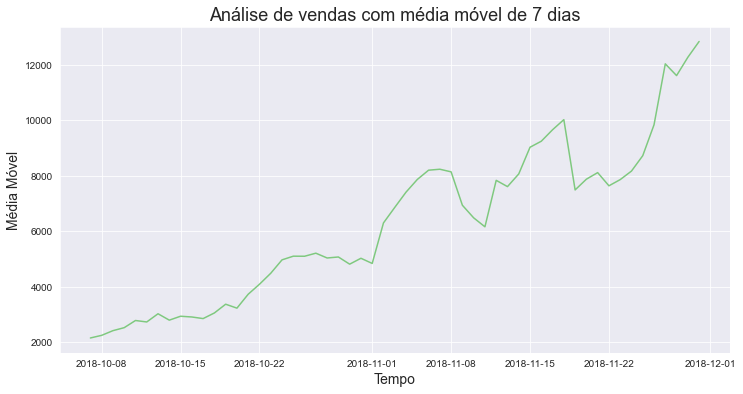

In [78]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [79]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

In [82]:
alucel.head()   

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN


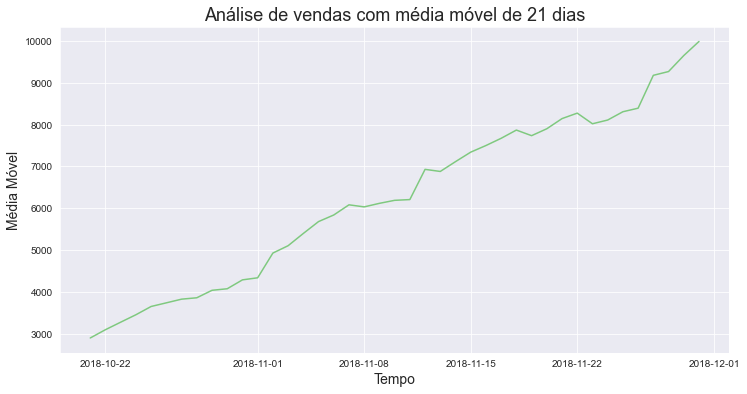

In [80]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

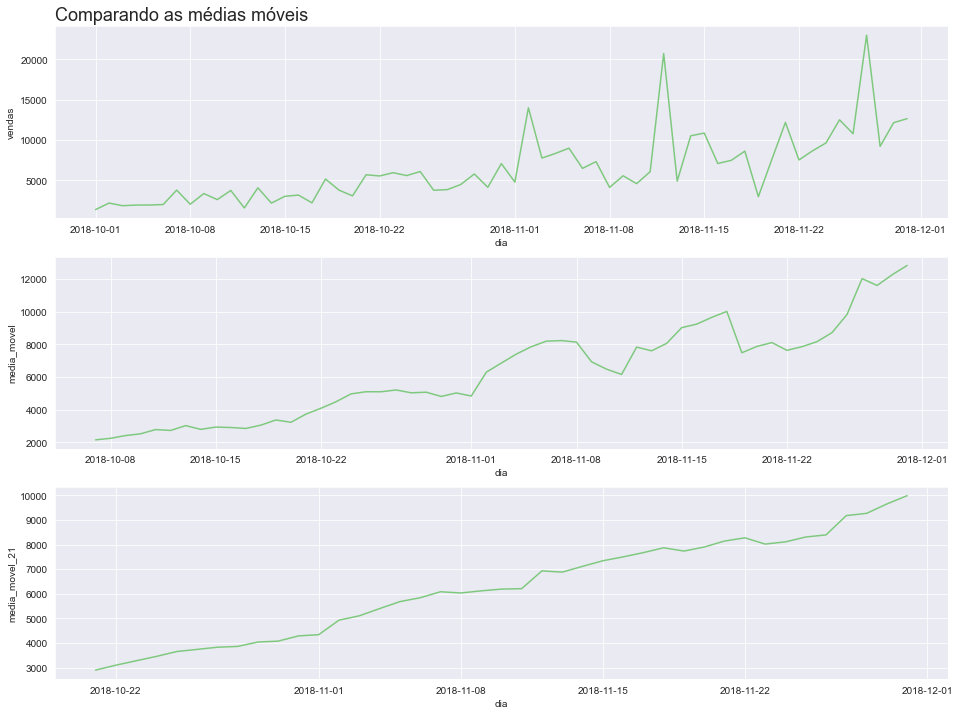

In [81]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')